In [81]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

x, y = np.meshgrid(np.linspace(-1,1,1000), np.linspace(-1,1,1000))
func = np.exp(-(x**2+y**2)/(2))

In [79]:
def get_fourier_2d(x, y, f):
    
    dx = np.abs(x[0,1]-x[0,0])
    dy = np.abs(y[1,0]-y[0,0])
    
    
    k_x = np.fft.fftfreq(x[0].size)*2*np.pi/dx
    k_y = np.fft.fftfreq(y[0].size)*2*np.pi/dy
    
    new_arr = np.zeros((k_x.size, k_y.size))
    for i in range(k_x.size):
        for j in range(k_y.size):
            new_arr[i][j] = k_x[i]*x[0,0]+k_y[j]*y[0,0]
    
    g = np.fft.fftshift(np.fft.fft2(f))
    g*=dx*dy*np.exp(-complex(0,1)*new_arr)/((2*np.pi))
    
    return k_x, k_y, g
    
    
    

In [80]:
k_x, k_y, g = get_fourier_2d(x, y, func)

In [65]:
func[0].size

1000

In [67]:
x[0].size

1000

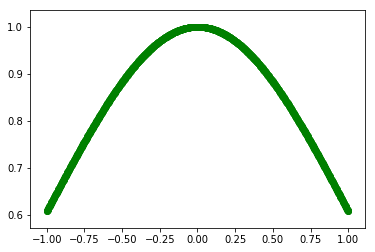

In [77]:
plt.scatter(x[5000],func[5000],color='g')
#plt.scatter(k_x,np.abs(g[500]),color="r")

#plt.gca().set_xlim(-1,1)
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x24ee54fbf60>,
 <matplotlib.image.AxesImage at 0x24ee59dea20>)

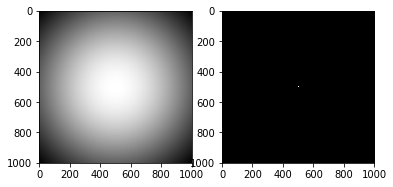

In [75]:
g = np.fft.fft2(func)
g = np.fft.fftshift(g)
plt.subplot(121),plt.imshow(func, cmap = 'gray')
plt.subplot(122),plt.imshow(100*np.abs(g), cmap = 'gray')

In [25]:
dx = np.abs(x[0,1]-x[0,0])
dy = np.abs(y[1,0]-y[0,0])
    
    
k_x = np.fft.fftfreq(x[0].size)*2*np.pi/dx
k_y = np.fft.fftfreq(y[0].size)*2*np.pi/dy
    
new_arr = np.zeros((k_x.size, k_y.size))
for i in range(k_x.size):
    for j in range(k_y.size):
        new_arr[i][j] = k_x[i]*x[0,0]+k_y[j]*y[0,0]
    

In [26]:
new_arr

array([[ -0.        ,  -3.13845106,  -6.27690212, ...,   9.41535318,
          6.27690212,   3.13845106],
       [ -3.13845106,  -6.27690212,  -9.41535318, ...,   6.27690212,
          3.13845106,   0.        ],
       [ -6.27690212,  -9.41535318, -12.55380424, ...,   3.13845106,
          0.        ,  -3.13845106],
       ...,
       [  9.41535318,   6.27690212,   3.13845106, ...,  18.83070637,
         15.6922553 ,  12.55380424],
       [  6.27690212,   3.13845106,   0.        , ...,  15.6922553 ,
         12.55380424,   9.41535318],
       [  3.13845106,   0.        ,  -3.13845106, ...,  12.55380424,
          9.41535318,   6.27690212]])

In [27]:
x[0,0]

-100.0

In [29]:
k_x[1]

0.031384510609362044

In [82]:
# perform the 2-D fast Fourier transform on the image data
fourier = np.fft.fft2(func)
# move the zero-frequency component to the center of the Fourier spectrum
fourier = np.fft.fftshift(fourier)
# compute the magnitudes (absolute values) of the complex numbers
fourier = np.abs(fourier)
# compute the common logarithm of each value to reduce the dynamic range
fourier = np.log10(fourier)
# find the minimum value that is a finite number
lowest = np.nanmin(fourier[np.isfinite(fourier)])
# find the maximum value that is a finite number
highest = np.nanmax(fourier[np.isfinite(fourier)])
# calculate the original contrast range
original_range = highest - lowest
# normalize the Fourier image data ("stretch" the contrast)
norm_fourier = (fourier - lowest) / original_range * 255
# convert the normalized data into an image

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


(<matplotlib.axes._subplots.AxesSubplot at 0x24e810447b8>,
 <matplotlib.image.AxesImage at 0x24e83851940>)

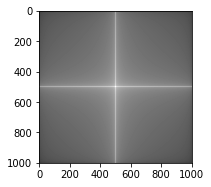

In [83]:
plt.subplot(122),plt.imshow(norm_fourier, cmap = 'gray')